In [ ]:
import sys
import os

os.chdir('..')

import xarray as xr
import aci.components.drought as dc
import aci.components.precipitation as pc
import aci.components.wind as wc
import aci.components.temperature as tc
import aci.components.sealevel as sl
import matplotlib.pyplot as plt
import seaborn as sns

# Example notebook to calculate all components

## Precipitation component calculous


In [2]:
precip_component = pc.PrecipitationComponent("data/required_data/1960-1970/ResPartOfParis_total_precipitation_1960-1970.nc", "../data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc")


In [3]:
prec = precip_component.calculate_component("tp", 5, ('1960-01-01', '1964-12-31'))
prec


/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


<xarray.DataArray 'tp' (latitude: 5, longitude: 9, time: 120)>
array([[[-0.5041716 , -0.28366452,  1.7213148 , ..., -2.8188667 ,
         -0.26017442,  0.12394263],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.04087852,  0.32170302,  1.3278244 , ..., -2.0561087 ,
         -0.45385608,  0.4996464 ],
        ...,
        [ 1.0228119 , -0.0278642 ,  0.22594203, ..., -3.0471094 ,
          0.4182715 , -0.5686015 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.67802584, -0.12785509,  0.67893505, ..., -2.6096263 ,
          1.2539304 , -0.36351138]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.4036206 ,  0.65879333,  0.07585744, ..., -2.4617078 ,
          1.2934781 , -0.6244917 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.20979877,  1.2209576 ,  0.28455412, ..., -1.8692443 ,
          0.9999703 ,  0.6223117 ],
        ...,
        [ 0.6750641 ,  0.13064696,  0.40764907, ..., -3.9849362 ,
          0.57707804, -0.55218846],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.6297373 , -0.51942277, -0.09517366, ..., -3.331495  ,
          0.74056137, -0.45809445]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
  * longitude  (longitude) float32 1.0 1.25 1.5 1.75 2.0 2.25 2.5 2.75 3.0
  * latitude   (latitude) float32 49.0 48.75 48.5 48.25 48.0

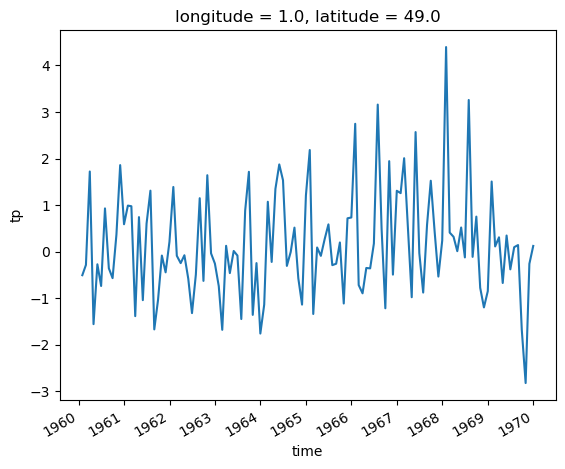

In [4]:
prec.isel(latitude=0, longitude= 0).plot()

/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


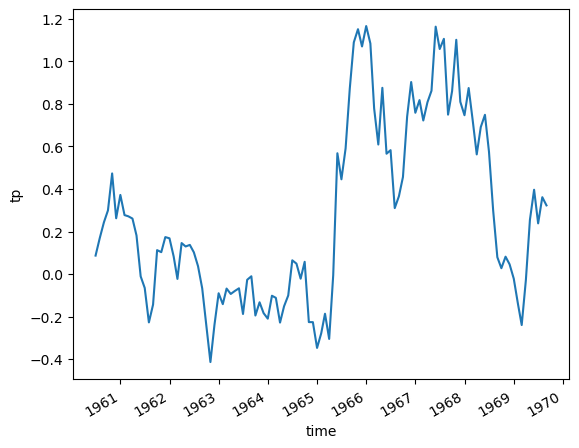

In [5]:
val = precip_component.calculate_component("tp", 5, ('1960-01-01', '1964-12-31'), True)

val.rolling(time=10,center=True).mean().plot()

## Wind component calculous


In [ ]:

wind_component = wc.WindComponent("data/required_data/1960-1970/ResPartOfParis_10m_u_component_of_wind_1960-1970.nc", "../data/required_data/1960-1970/ResPartOfParis_10m_v_component_of_wind_1960-1970.nc", "../data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc")

wind = wind_component.std_wind_exceedance_frequency(('1960-01-01', '1964-12-31'))


In [7]:
wind

<xarray.DataArray (latitude: 5, longitude: 9, time: 120)>
array([[[-0.53925985, -0.37873335, -0.36288737, ..., -2.2453656 ,
          1.4226567 , -1.11417203],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.40492914, -0.36496834, -0.4271211 , ..., -2.24780595,
          0.95399809, -0.0805823 ],
        ...,
        [-0.43707864, -0.29968542, -0.4938648 , ..., -2.07328422,
          1.125     , -1.00899568],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.61556784, -0.27293815, -0.51987524, ..., -1.86253229,
          0.9009982 , -0.87705802]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.17739372, -0.246258  , -0.60583925, ..., -2.38365647,
          0.69748583, -0.6799001 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.29880715,  0.06839011, -0.60583925, ..., -2.59973473,
          1.13224412, -0.96076892],
        ...,
        [-0.44307902,  0.42292837, -0.48224282, ..., -2.71609885,
          2.17043413, -1.16554303],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.4271211 ,  0.5124819 , -0.11624764, ..., -2.31729649,
          1.67140798, -1.11417203]]])
Coordinates:
  * time       (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
  * longitude  (longitude) float32 1.0 1.25 1.5 1.75 2.0 2.25 2.5 2.75 3.0
  * latitude   (latitude) float32 49.0 48.75 48.5 48.25 48.0

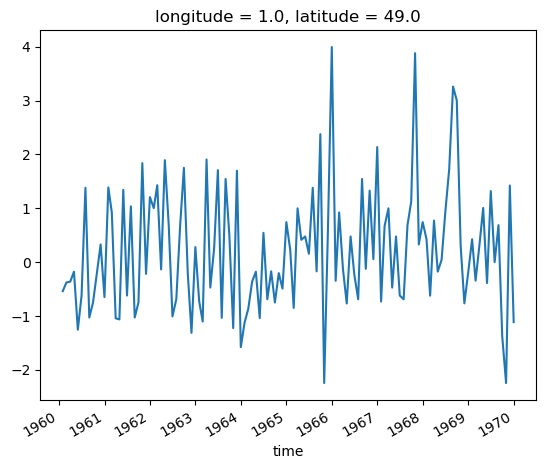

In [8]:
wind.isel(latitude = 0, longitude = 0).plot()

In [ ]:
val = wind_component.std_wind_exceedance_frequency(('1960-01-01', '1964-12-31'), True)

val.rolling(time=12,center=True).mean().plot()

## Drought component calculous


In [ ]:
drought_component = dc.DroughtComponent("data/required_data/1960-1970/ResPartOfParis_total_precipitation_1960-1970.nc", "../data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc")

cdd = drought_component.std_max_consecutive_dry_days(('1960-01-01', '1964-12-31'))

In [11]:
cdd

<xarray.DataArray 'days_below_thresholds' (latitude: 5, longitude: 9, time: 120)>
array([[[-1.56892908, -0.56195149,  0.75482941, ..., -2.44120041,
          0.91766294, -0.44232587],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 1.58113883, -0.56195149,  1.19522861, ..., -1.38218948,
         -0.55901699,  1.03209369],
        ...,
        [ 1.02899151, -0.98782916,  1.16554303, ..., -1.53644256,
         -2.54950976,  0.60302269],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 1.11803399, -0.86474714,  1.56892908, ..., -1.08465229,
         -3.25847312,  0.40089186]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 1.02899151, -0.54433105, -0.11624764, ..., -0.67042381,
          0.08333333, -1.75      ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.68599434, -0.5       , -0.11624764, ..., -0.98782916,
          0.81649658, -1.56892908],
        ...,
        [ 1.56892908, -0.27854301, -0.75      , ..., -1.4509525 ,
          0.92827912,  1.88648444],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 1.56892908,  0.24019223, -0.81649658, ..., -1.4509525 ,
          1.58113883,  1.91674543]]])
Coordinates:
  * time       (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
  * longitude  (longitude) float32 1.0 1.25 1.5 1.75 2.0 2.25 2.5 2.75 3.0
  * latitude   (latitude) float32 49.0 48.75 48.5 48.25 48.0

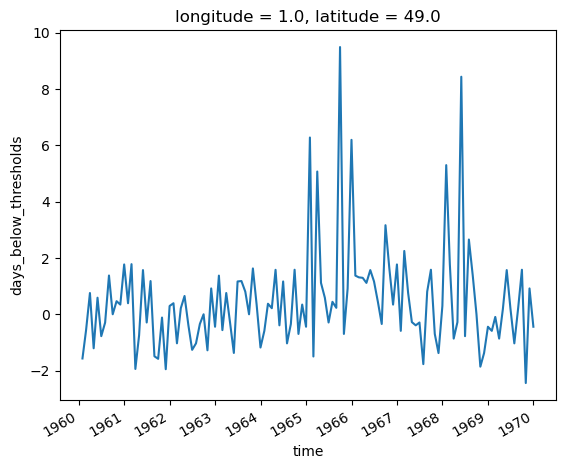

In [12]:
cdd.isel(latitude=0 , longitude =0).plot()

In [ ]:
val = drought_component.std_max_consecutive_dry_days(('1960-01-01', '1964-12-31'), True)
val.rolling(time=12,center=True).mean().plot()

## Temperature component calculous


In [14]:
temp10_component = tc.TemperatureComponent(
    "data/required_data/1960-1970/ResPartOfParis_2m_temperature_1960-1970.nc", 
    "data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc"
    
)


In [ ]:
val10 = temp10_component.calculate_component(('1960-01-01', '1964-12-31'), True)
val90 = temp90_component.calculate_component(('1960-01-01', '1964-12-31'), True)

In [16]:
val90

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
Data variables:
    t2m      (time) float64 0.8779 -0.2692 0.4915 0.3291 ... 4.381 0.1994 0.7183

In [17]:
val10

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
Data variables:
    t2m      (time) float64 -0.2953 -0.09884 -1.042 ... 0.8713 3.338 0.8332

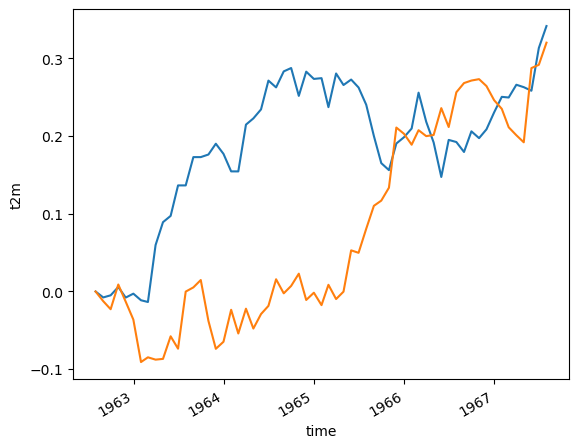

In [18]:
temp_component.plot_components(val10, val90, 60)

## Sealevel component calculous


In [19]:
sea_level_component = sl.SeaLevelComponent("FRA", ('1960-01-01', '1969-12-31'), ('1960-01-01', '1964-12-31')  )

In [20]:
niv_mer = sea_level_component.process()

<Axes: xlabel='Corrected_Date'>

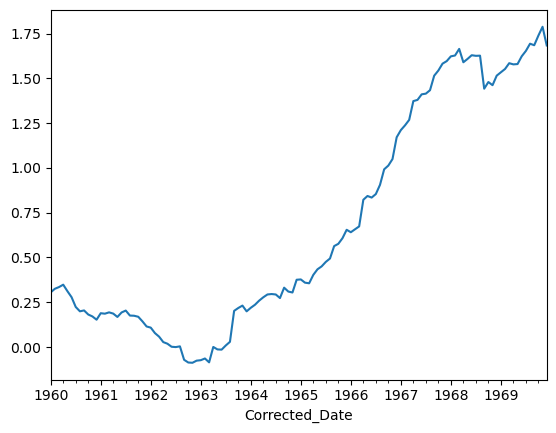

In [21]:
car = sea_level_component.convert_to_xarray(niv_mer)
a= niv_mer.mean(axis=1)
a.rolling(window=60, min_periods=12, center=True).mean().plot()